In [1]:
# Read the .uri file
with open('ZINC-downloader-2D-smi20220101.uri', 'r') as file:
    uris = file.readlines()

# Strip any newline characters
uris = [uri.strip() for uri in uris]

# Print URIs to check the content
print(uris)


['http://files.docking.org/2D/AA/AAAA.smi', 'http://files.docking.org/2D/AA/AAAB.smi', 'http://files.docking.org/2D/AA/AAAC.smi', 'http://files.docking.org/2D/AA/AAAD.smi', 'http://files.docking.org/2D/AA/AABA.smi', 'http://files.docking.org/2D/AA/AABB.smi', 'http://files.docking.org/2D/AA/AABC.smi', 'http://files.docking.org/2D/AA/AABD.smi', 'http://files.docking.org/2D/AA/AACA.smi', 'http://files.docking.org/2D/AA/AACB.smi', 'http://files.docking.org/2D/AA/AACC.smi', 'http://files.docking.org/2D/AA/AACD.smi', 'http://files.docking.org/2D/AA/AAEA.smi', 'http://files.docking.org/2D/AA/AAEB.smi', 'http://files.docking.org/2D/AA/AAEC.smi', 'http://files.docking.org/2D/AA/AAED.smi', 'http://files.docking.org/2D/BA/BAAA.smi', 'http://files.docking.org/2D/BA/BAAB.smi', 'http://files.docking.org/2D/BA/BAAC.smi', 'http://files.docking.org/2D/BA/BAAD.smi', 'http://files.docking.org/2D/BA/BABA.smi', 'http://files.docking.org/2D/BA/BABB.smi', 'http://files.docking.org/2D/BA/BABC.smi', 'http://fi

In [2]:
len(uris)

1912

#### Try and test the first one

In [4]:
import requests
import pandas as pd
import io

# Take the first URI
first_uri = uris[0]

# Download the data
response = requests.get(first_uri)

# Check if the request was successful
if response.status_code == 200:
    # Read the content of the response
    content = response.content.decode('utf-8')
    
    # Use StringIO to create a file-like object from the string
    string_io = io.StringIO(content)
    
    # Read the CSV data
    df = pd.read_csv(string_io, sep='\t')  # Assuming tab-separated values, change if necessary
    
    # Save to CSV
    output_file = 'first_zinc_uri_data.csv'
    df.to_csv(output_file, index=False)
    
    print(f"Data from the first URI has been downloaded and saved to {output_file}")
    print(f"Shape of the data: {df.shape}")
    print("\nFirst few rows of the data:")
    print(df.head())
else:
    print(f"Failed to download data. Status code: {response.status_code}")

Data from the first URI has been downloaded and saved to first_zinc_uri_data.csv
Shape of the data: (2405, 1)

First few rows of the data:
                                      smiles zinc_id
0         CO[C@H]1OC[C@@H](O)[C@H](O)[C@H]1O 4371221
1                  NC(=O)N[C@@H]1NC(=O)NC1=O 1843030
2                         NC(=O)CN1CCC(N)CC1 9256947
3                      CNC(=O)c1n[nH]c(N)n1 19844301
4  NC(=O)[C@H]1[C@H]2C=C[C@@H](O2)[C@@H]1N 242677143


#### Download and save for 100 - 149

In [3]:
import requests
import pandas as pd
import io
from tqdm import tqdm

def download_and_process_uri(uri):
    try:
        response = requests.get(uri, timeout=10)
        response.raise_for_status()
        content = response.content.decode('utf-8')
        string_io = io.StringIO(content)
        df = pd.read_csv(string_io, sep='\t', header=None, names=['smiles zinc_id'])
        
        # Split the 'smiles zinc_id' column into two separate columns
        df[['smiles', 'zinc_id']] = df['smiles zinc_id'].str.rsplit(n=1, expand=True)
        
        # Drop the original combined column
        df = df.drop(columns=['smiles zinc_id'])
        
        return df, None
    except requests.exceptions.RequestException as e:
        return None, f"Error downloading {uri}: {str(e)}"

# Select the 50 to 99 URIs
uris_to_process = uris[100:149]

# Lists to store results and errors
all_dfs = []
errors = []

# Process each URI
for uri in tqdm(uris_to_process, desc="Downloading URIs"):
    df, error = download_and_process_uri(uri)
    if df is not None:
        all_dfs.append(df)
    else:
        errors.append(error)

# Combine all dataframes
if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    
    # Save to CSV
    output_file = 'zinc_data_100_to_149_processed.csv'
    combined_df.to_csv(output_file, index=False)
    
    print(f"\nData from successful downloads has been saved to {output_file}")
    print(f"Shape of the combined data: {combined_df.shape}")
    print("\nFirst few rows of the combined data:")
    print(combined_df.head())
else:
    print("\nNo data was successfully downloaded and processed.")

# Print summary
print("\nDownload Summary:")
print(f"Total URIs processed: {len(uris_to_process)}")
print(f"Successful downloads: {len(all_dfs)}")
print(f"Failed downloads: {len(errors)}")

if errors:
    print("\nErrors encountered:")
    for error in errors:
        print(error)

print("\nNote: You may need to check the ZINC database documentation for updated URL formats or access methods.")


Data from successful downloads has been saved to zinc_data_100_to_149_processed.csv
Shape of the combined data: (1086915, 2)

First few rows of the combined data:
                      smiles  zinc_id
0                     smiles  zinc_id
1            OC[C@@H]1CCCNC1   388342
2  C[C@@H](O)C(CO)[C@@H](C)O   410291
3                 NCC1(O)CC1  2540025
4                 CN1CCN=C1N  3075393

Download Summary:
Total URIs processed: 49
Successful downloads: 49
Failed downloads: 0

Note: You may need to check the ZINC database documentation for updated URL formats or access methods.


In [6]:
from rdkit.Chem import Draw
# Set the maximum number of molecules to display
Draw.IPythonConsole.maxMols = 200  # or any other number you want

C:\Users\xueli\AppData\Local\Temp\ipykernel_17756\3497202313.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('zinc_data_100_to_149_processed.csv')


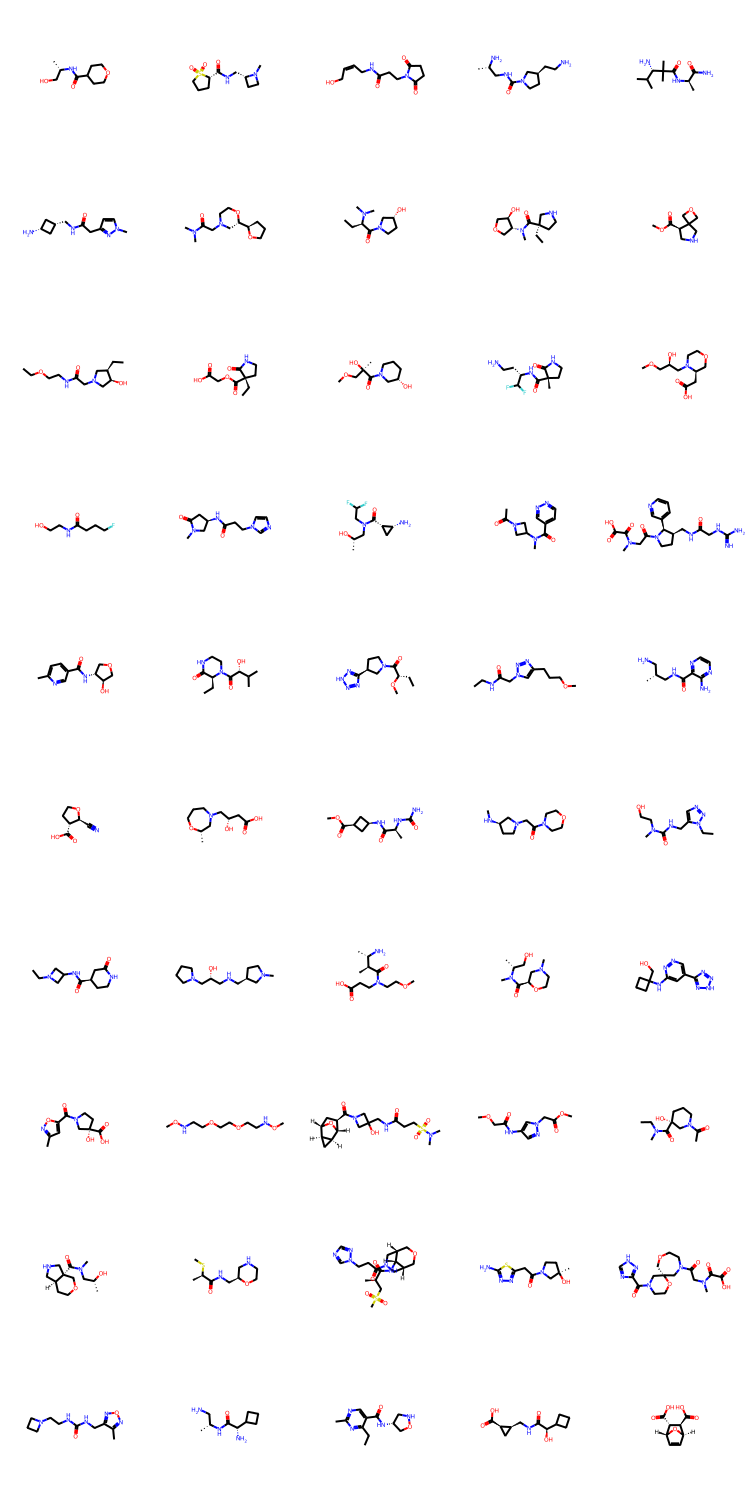

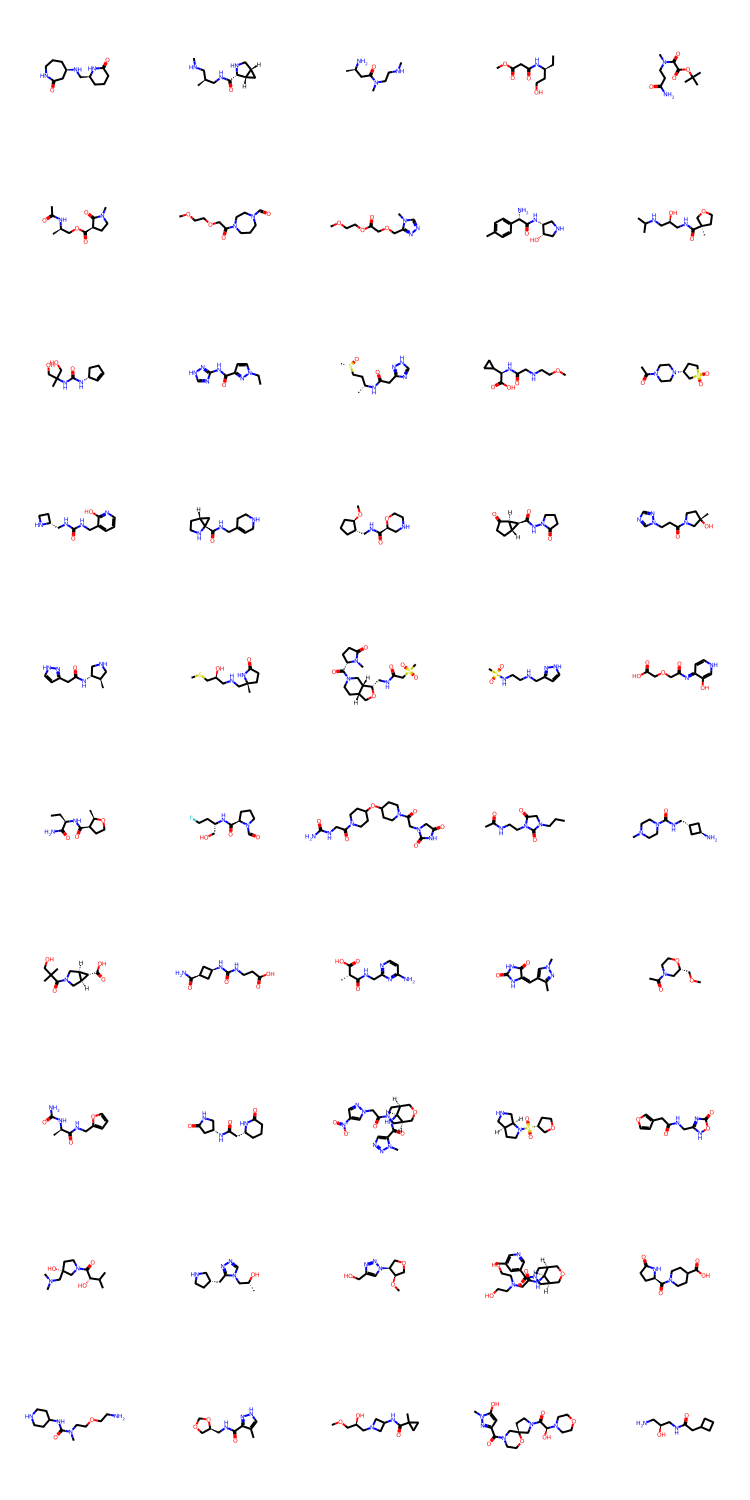

In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Load the processed data
combined_df = pd.read_csv('zinc_data_100_to_149_processed.csv')

# Randomly select 100 SMILES
random_smiles = combined_df['smiles'].sample(100, random_state=42)
molecules = [Chem.MolFromSmiles(smiles) for smiles in random_smiles]

# Split the list into two halves to display in two grids
molecules_1 = molecules[:50]
molecules_2 = molecules[50:]

# Draw the first grid of 50 molecules
img1 = Draw.MolsToGridImage(molecules_1, molsPerRow=5, subImgSize=(150, 150))
display(img1)

# Draw the second grid of 50 molecules
img2 = Draw.MolsToGridImage(molecules_2, molsPerRow=5, subImgSize=(150, 150))
display(img2)
